In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from librosa import display

In [15]:
def show_wav(filename):
    y, sr = librosa.load(filename,sr=None)

    plt.subplots(nrows=2, ncols=1,figsize=(20,10))
    plt.subplot(211)
    N = y.shape[0]
    T = np.arange(N) / sr
    plt.plot(T, y)
    
    plt.subplot(212)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    display.specshow(D, sr=sr, y_axis='log', x_axis='time')

def show_spec(filename, y_axis='log', n_fft=2048, start=0, end=None):
    y, sr = librosa.load(filename,sr=None)
    start = int(start*sr)
    end = y.shape[0] if end is None else int(end*sr)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y[start:end], n_fft=n_fft, hop_length=n_fft//2)), ref=np.max)
    display.specshow(D, sr=sr, hop_length=n_fft//2, y_axis=y_axis, x_axis='time')
    return D
    
#show_wav('OK1.wav')

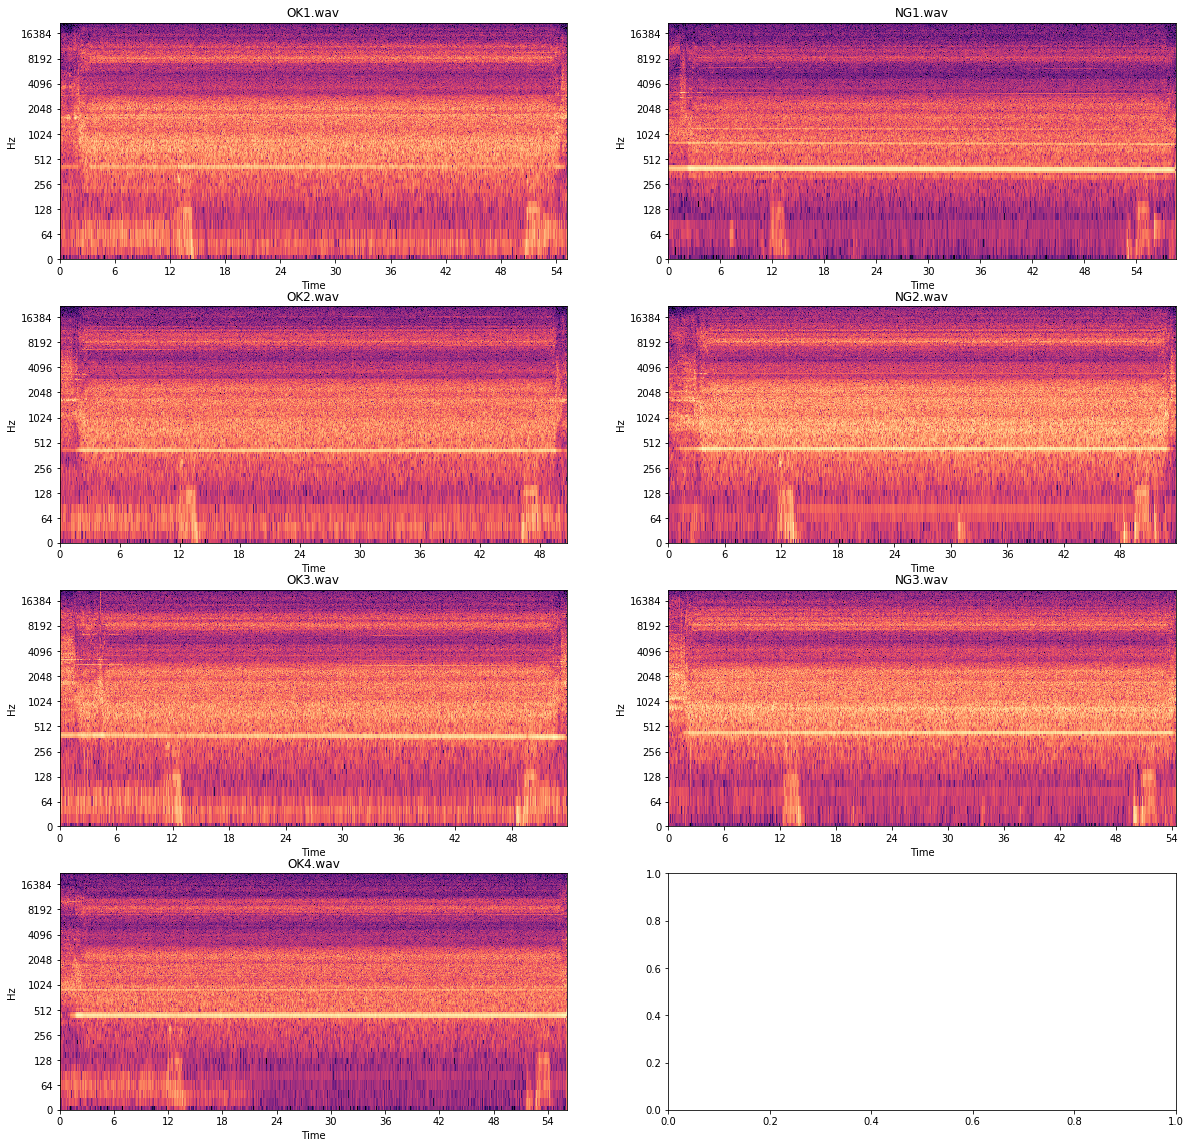

In [16]:
plt.subplots(nrows=4, ncols=2,figsize=(20,20))
filenames = ['OK1.wav', 'NG1.wav', 'OK2.wav', 'NG2.wav', 'OK3.wav', 'NG3.wav', 'OK4.wav']
for k, f in enumerate(filenames):
    ax = plt.subplot(4, 2, k+1)
    show_spec(f, start=0, end=None)
    ax.set_title(f)


<img src="ok3-ng2.png">

<img src="ok3-ng2-stft.png">

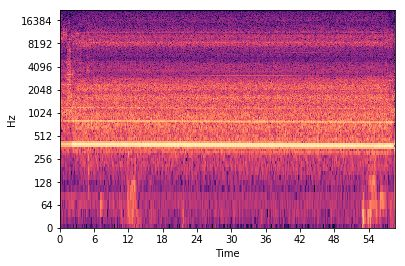

In [17]:
D = show_spec('NG1.wav', start=0, end=None)

In [19]:
D.shape

(1025, 2521)